# Assignment 3 - Supervised Learning

## *Joseph Krinke*
Netid: jdk61

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

## 1

**ANSWER**

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

The likelihood function we are trying to maximize is the following. 
$$P(y|X) = \prod_{i=1}^{N}\hat{y}_i^{y_i}[1-\hat(y_i)]^{1-y_i}$$

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

The cost function is given by:
$$C(w) = -\sum_{i=1}^{N}\frac{1}{N}(y_i log(\hat{y_i}) + (1-y_i)log(1-\hat{y_i}))$$

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. ${\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

The gradient of the cost function is given by
$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[(y-\hat{y}_i)x_0, (y-\hat{y}_i))x_1, (y-\hat{y}_i))x_2\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

Assuming $w_i$ is a vector of weights:
$$w_{i+1} = w_i - \eta \cdot \nabla_{\mathbf{w}}C(\mathbf{w_i}) $$

**(e)** 
Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?


**The data does not appear to be perfectly separable. There are a number of points in class 1 contained within the class 2 cluster in the center. A logistic regression model would do well at classifying the class 0 points (in the center), but would have difficulty classifying the class 1 points contained in the center cluster. The code below loads the dataset and plots the groups by class.**

In [2]:
#Importing data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
data = pd.read_csv('A3_Q1_data.txt')
data.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


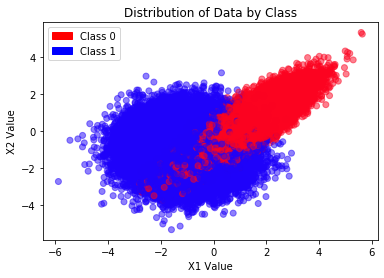

In [3]:
#Plotting data
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from math import pow
red_patch = mpatches.Patch(color='red', label='Class 0') #Generating legend colors and text
blue_patch = mpatches.Patch(color='blue', label='Class 1')
cmap_class = ListedColormap(['#fc0320','#1f02fa' ]) #Creating corn-esque color map
plt.scatter(data['x1'], data['x2'], c = data['y'], alpha = .5, cmap=cmap_class)
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.title('Distribution of Data by Class')
plt.legend(handles = (red_patch, blue_patch))

plt.show()

**(f)** 
Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

**There do not appear to be any missing observations in the data. The data looks pretty clean, as the classes are exactly evenly distributed and both x variables have simililar minimums, maximums, and standard deviations. It does not appear that any transformations are needed.**

In [4]:
#Getting summary statistics of data.
print(data.describe())

#Getting count of incomplete obervations. 
print(data.isnull().sum())

                  x1             x2              y
count  100000.000000  100000.000000  100000.000000
mean        0.048529      -0.397106       0.500000
std         1.452409       1.164015       0.500003
min        -5.886436      -5.352265       0.000000
25%        -1.041007      -1.206343       0.000000
50%         0.039551      -0.401099       0.500000
75%         1.143536       0.402899       1.000000
max         5.634476       5.317718       1.000000
x1    0
x2    0
y     0
dtype: int64


**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

In [5]:
#Defining logistic regression class
def logisticreg (x_values, weights):
        line = np.exp(weights[0] + weights[1] * x_values[:,0] +  weights[2] * x_values[:,1]) 

        p = line/ (1+line)
        return(p)

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

In [6]:
#Cost function calculator

def CostFunction(y_value, predicted_prob):
    cost = -np.average((y_value*np.log(predicted_prob+1e-7))+((-y_value+1)*np.log(- predicted_prob +1+1e-7)))
    
    return(cost)

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

In [7]:
import random
np.random.seed(0)



#Gradient descent algorithm that also returns costs. 
def GradientDescentCost(train_data, test_data, l_rate):
   #Seperate x and y values
    x_train = train_data[:,:-1]
    y_train = train_data[:,-1]
    x_test = test_data[:,:-1]
    y_test = test_data[:,-1]
    length = train_data.shape[0]
    weights = np.array([random.random(), random.random(), random.random()])
    train_costs = [] #Array to hold training and test costs for part k
    test_costs = []
    cost_train = CostFunction(y_train,logisticreg(x_train, weights)) #Find initial cost with random weights
    cost_change = 10 #Create variable to hold cost change over each iteration. This will determine when the algorithm stops. 
    test_costs.append(CostFunction(y_test, logisticreg(x_test,weights))) #Add initial cost on test data.
    train_costs.append(cost_train) #Add initial cost on training data. 
    while(cost_change > (10**-6)):
        weights[0] = weights [0] - ((l_rate/length)* np.sum((logisticreg(x_train, weights) - y_train)))
        weights[-2:]= weights[-2:] - ((l_rate / length) * (x_train.T @ (logisticreg(x_train, weights) - y_train)))
        new_cost = CostFunction(y_train, logisticreg(x_train, weights))
        cost_change = cost_train-new_cost
        cost_train = new_cost
        train_costs.append(cost_train)
        test_costs.append(CostFunction(y_test, logisticreg(test_data,weights)))

    return(weights, train_costs, test_costs)

#Gradient descent algorithm that does not return costs. 
def GradientDescentFit(train_data, l_rate):
   #Seperate x and y values
    x_train = train_data[:,:-1]
    y_train = train_data[:,-1]
    length = train_data.shape[0]
    weights = np.array([random.random(), random.random(), random.random()])
    cost_train = CostFunction(y_train,logisticreg(x_train, weights)) #Find initial cost with random weights
    cost_change = 10 #Create variable to hold cost change over each iteration. This will determine when the algorithm stops. 
    while(cost_change > (10**-6)):
        weights[0] = weights [0] - ((l_rate/length)* np.sum((logisticreg(x_train, weights) - y_train)))
        weights[-2:]= weights[-2:] - ((l_rate / length) * (x_train.T @ (logisticreg(x_train, weights) - y_train)))
        new_cost = CostFunction(y_train, logisticreg(x_train, weights))
        cost_change = cost_train-new_cost
        cost_train = new_cost

    return(weights)
    
    

    
    

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

**Larger learning rates generally make the cost for the logistic regression algorithm decrease faster. Your weights get updated 'more' when you are learning faster. This means that larger learning rates make your algorithm converage with less iterations. The problem is that you don't want to iterate too quickly and miss a perfect set of weights. I chose to go with a value of .1 for my learning rate, as I wanted a balance between iteration number and end cost.**

In [8]:
#Creating training and test sets
numpy_data = data.to_numpy()
randnums = np.random.randn(len(data)) < .70
training = numpy_data[randnums]
test_data = numpy_data[~randnums]


In [9]:
#Defining function to plot the cost trends.

def costplot(GradOutput, l_rate):
    plt.plot(GradOutput[1], label = 'Training Cost')
    plt.title('Training and Test Cost With Learning Rate:{0:.5f}'.format(l_rate))
    plt.ylabel('Cost')
    plt.xlabel('Number of Iterations')
    plt.plot(GradOutput[2], label = 'Test Cost')
    plt.show()


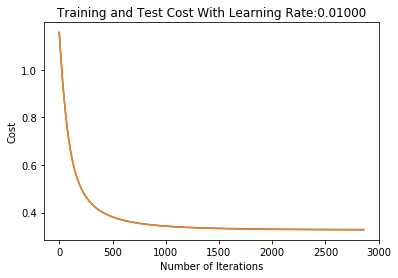

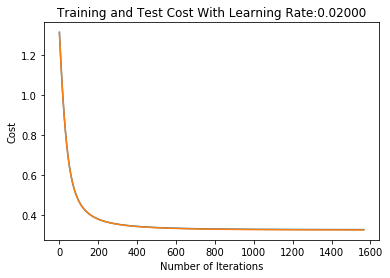

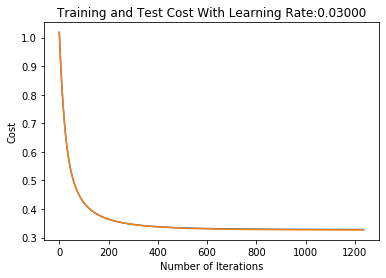

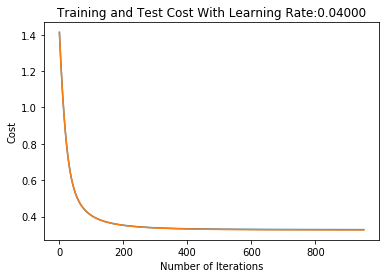

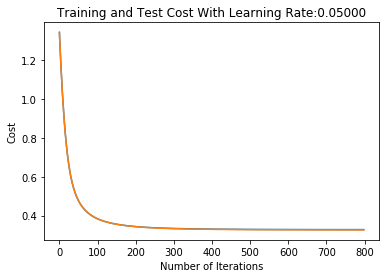

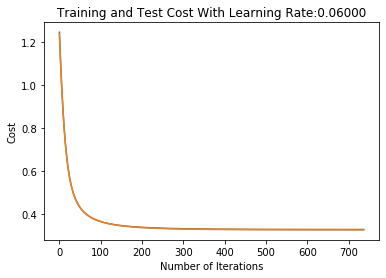

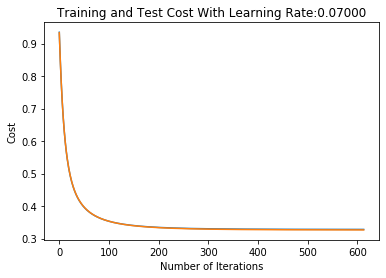

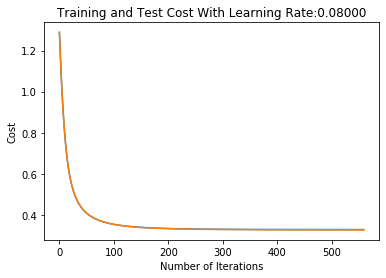

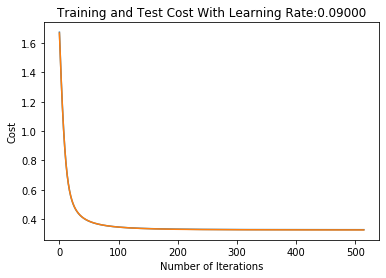

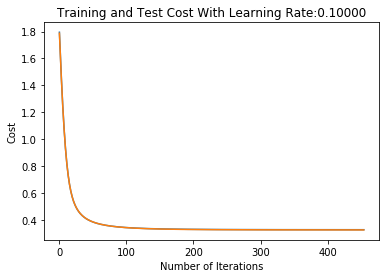

In [10]:
#Producing plots for values of the learning rate from .01 to .1, increasing by .01 each time.
for i in range(10):
    costplot(GradientDescentCost(training,test_data,(i/100)+.01),(i/100)+.010)

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). 

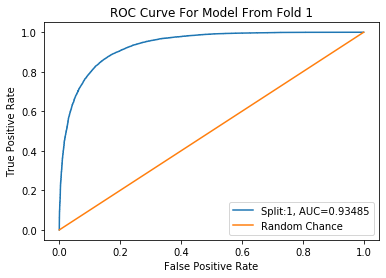

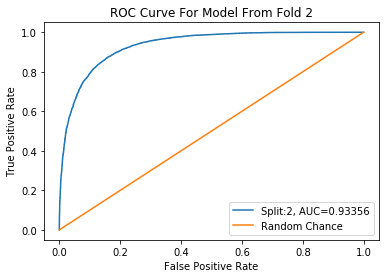

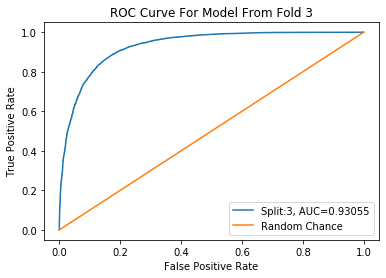

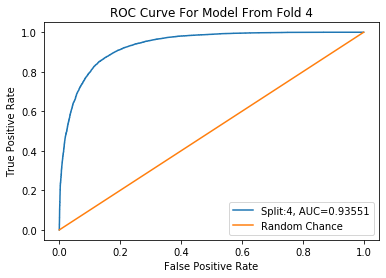

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

skf = StratifiedKFold(n_splits=4) # Spliting 4 times for cross validation 
X = numpy_data[:,:-1] #Separating values and y values
y = numpy_data[:,-1]

#Iterating to fit model on each fold
for i, (train, test) in enumerate(skf.split(X, y)):
    weights = GradientDescentFit(numpy_data[train], .10)
    pred_probs = logisticreg(numpy_data[test],weights)
    true_classes = y[test]
    auc = metrics.roc_auc_score(true_classes,pred_probs)
    fpr, tpr, thresholds = metrics.roc_curve(true_classes,  pred_probs)
    plt.plot(fpr,tpr,label='Split:'+str(i+1)+', AUC={0:.5f}'.format(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve For Model From Fold ' + str(i+1))
    boundary = [0.0, 1.0]
    plt.plot(boundary, boundary, label='Random Chance')
    plt.legend(loc=4)
    plt.show()



**(m)** Why do we use cross validation?

**When one fits a model, they generally fit it  on a training data set first. The goal of most modeling is to produce a model that will generalize well to any set of data that is provided. However, since we only fit our model on training data, we cannot be sure that our model will perform well in practice. Cross-validation allows one to gain some insight into how well a model will perform on unavailable data.
Additionally, cross-validation also helps you determine how flexible your model should be. A model with high variance may have performance that changes wildly across each individual fitted fold. Checking cross-validation performance can help ensure that you aren't inadvertently overfitting. Thus, cross-validation can serve as one way you can compare potential models to choose from and select hyperparameters for your model.**

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**It does appear that the decision boundary could be improved. Currently there are a number of observations within class 0 that are being misclassified. However, it looks like we would need to make our model more flexible in order to be able to capture the non-linearity of the decision boundary. This would require significant transformation of the data or a different classification technique.**

In [12]:
#Calculate the weights for the model using the training data
weights_train = GradientDescentFit(numpy_data, .10)
predicted_train = logisticreg(numpy_data,weights_train)

#Find the optimal cutoff value for the data. 
def Find_Cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

print(Find_Cutoff(y, predicted_train))

[0.5216005189354136]


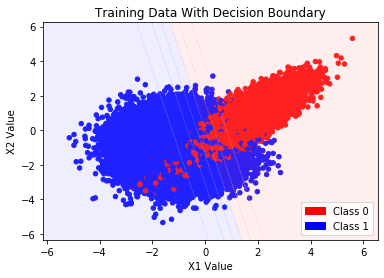

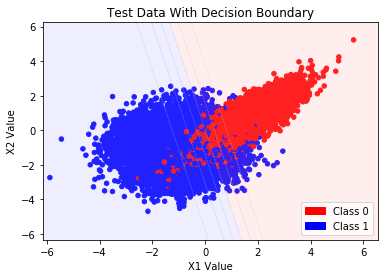

In [13]:
#Create a scatterplot of both the training and test sets with the decision boundary displayed. 
from sklearn.datasets import make_moons 
import matplotlib
from random import sample
from matplotlib.colors import ListedColormap
#Training data
train_label = training[:,-1]
#Calculate the weights for the model using the training data
weights_train = GradientDescentFit(training, .80)



#Creaing label/legend patches for graph
red_patch = mpatches.Patch(color='red', label='Class 0') #Generating legend colors and text
blue_patch = mpatches.Patch(color='blue', label='Class 1')

#Create grid of x values that we can apply our weights to. 
x1_min, x1_max = training[:, 0].min() - 1,training[:, 0].max() + 1
x2_min, x2_max = training[:, 1].min() - 1, training[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))
line = np.exp(weights_train[0] + weights_train[1] * xx +  weights_train[2] * yy) 
z =  line/ (1+line)
Z = logisticreg((np.c_[xx.ravel(), yy.ravel()]), weights_train) #Generating predictions to be turned into colored regions of classes.
Z = Z.reshape(xx.shape)
Z = z.reshape(xx.shape)
colors = ['red', 'blue']
color_map = ListedColormap(['#FFAAAA', '#AAAAFF']) #Setting colors for background
plt.scatter(training[:,0], training[:,1], c = train_label, s=20, cmap = matplotlib.colors.ListedColormap(colors))
plt.contourf(xx, yy, Z, alpha=0.2, cmap = color_map)
plt.title('Training Data With Decision Boundary')
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.legend(handles=[red_patch, blue_patch], loc = 'lower right', fontsize = '10')
plt.show()




#Repeating the previous process using the test data
test_label = test_data[:,-1]
plt.scatter(test_data[:,0], test_data[:,1], c = test_label, s=20,  cmap = matplotlib.colors.ListedColormap(colors))
plt.contourf(xx, yy, Z, alpha=0.2, cmap = color_map)
plt.title('Test Data With Decision Boundary')
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.legend(handles=[red_patch, blue_patch], loc = 'lower right', fontsize = '10')
plt.show()

## 2

**ANSWER**

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 


In [14]:
from keras.datasets import mnist

Using TensorFlow backend.


In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

In [16]:
#Plotting ten threes and 10 non-threes.
y_train_arr = np.array(y_train)
three_indices = np.where((y_train_arr==3))
threes = X_train[three_indices]
non_three_indices = np.where((y_train_arr!=3))
non_threes = X_train[non_three_indices]

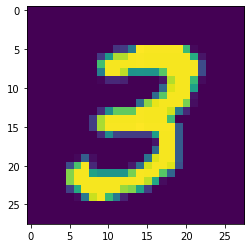

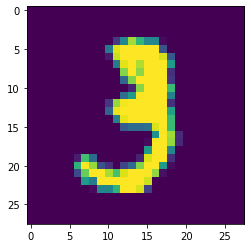

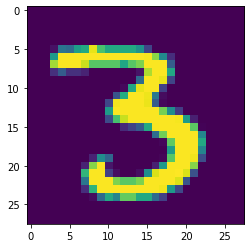

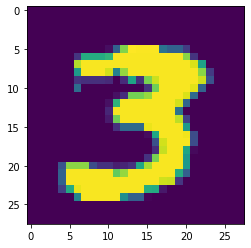

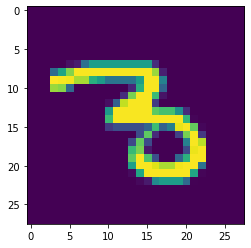

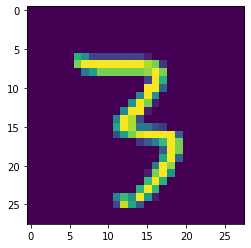

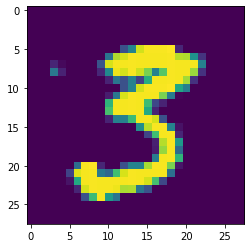

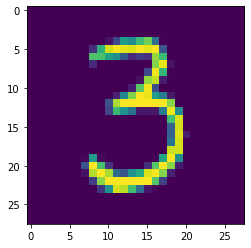

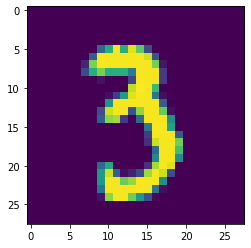

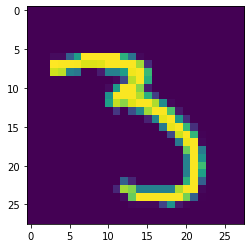

In [17]:
#Printing ten threes
for i in range(10):
    plt.imshow(threes[i])
  
    plt.show()

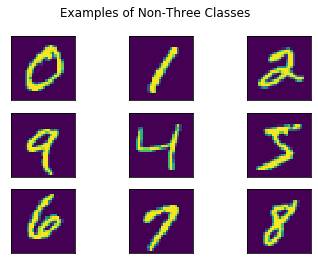

In [18]:
#Printing non-threes
figure = plt.figure()
for i in [x for x in range(10) if x != 3]:
    num_indices= np.where((y_train_arr==i))
    num = X_train[num_indices]
    if i <9:
        plt.subplot(330 + i+1)
        plt.imshow(num[0])
    else:
        plt.subplot(334)
        plt.imshow(num[0])
    #Removing labels
    plt.xticks([])
    plt.yticks([])
figure.suptitle('Examples of Non-Three Classes')
plt.show()

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**The classes are relatively balanced across each of the numbers. However, once we convert our target to being a binary 3 and non-three, we will have the vast majority as class non-three [approximately 89.78%]. It is possible that our algorithm will overpredict the other class in order to maximize/minimize whatever function it uses to fit itself.**


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


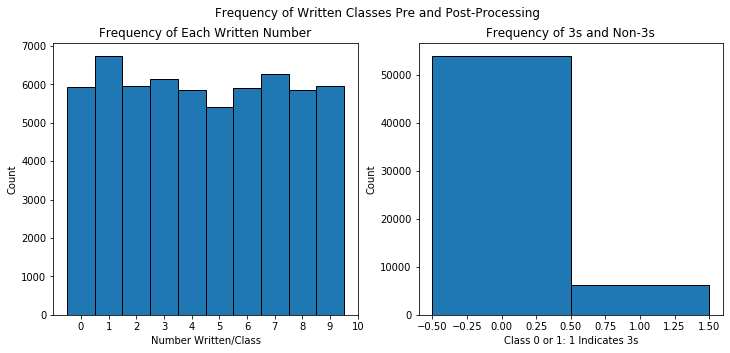

In [19]:
#Checking how many occurances of each class. 
classes, counts = np.unique(y_train_arr, return_counts=True)
class_count = dict(zip(classes, counts))
print(class_count)
#Plotting histogram of numbers/classes.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
mybins =np.arange(y_train.min(), y_train.max()+2)
ax1.hist(y_train, bins=mybins-.5,histtype='bar', ec='black')
ax1.set_ylabel('Count')
ax1.set_xlabel('Number Written/Class')
ax1.set_title('Frequency of Each Written Number')
ax1.set_xticks(mybins)


#Converting data from indiviudal numbers to 3 and  other.
binary_train = (y_train == 3)
binary_train = binary_train.astype(int)
binary_test = (y_test == 3)
binary_test = binary_test.astype(int)

#Plotting histogram of numbers/classes after conversion
mybins2 =np.arange(binary_train.min(), binary_train.max()+2)
ax2.hist(binary_train, bins=mybins2-.5, histtype='bar', ec='black')
ax2.set_title('Frequency of 3s and Non-3s')
ax2.set_xlabel('Class 0 or 1: 1 Indicates 3s')
ax2.set_ylabel('Count')
plt.suptitle('Frequency of Written Classes Pre and Post-Processing')


plt.show()

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**The random forest classifier I chose produced an overall accuracy of about 97%. Randomly guessing produced an accuracy of 50%, while predicting all not 3s produced an accuracy of 89.7%. If you examine the ROC and precision-recall curves it is clear the 'high-accuracy' all not 3s model performed very poorly. One should be careful about using accuracy as a metric, especially when classes are severely unbalanced.**

In [20]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#Preprocessing images to be used by the classifier
train_rows, train_numx, train_numy = X_train.shape
train_dataset = X_train.reshape((train_rows,train_numx*train_numy))

#Repeating for test data
test_rows, test_numx, test_numy = X_test.shape
test_dataset = X_test.reshape((test_rows,test_numx*test_numy))
#K-fold cross validation. 
kfold4 = StratifiedKFold(n_splits = 4)
for i, (train, validation) in enumerate(kfold4.split(train_dataset, binary_train)):
    tree_small= tree.DecisionTreeClassifier()
    tree_small.fit(train_dataset[train],binary_train[train])
    small_tree_score = tree_small.score(train_dataset[validation], binary_train[validation])
    random_forest = RandomForestClassifier()
    random_forest.fit(train_dataset[train],binary_train[train])
    forest_score = random_forest.score(train_dataset[validation],binary_train[validation])
    print('Decision Tree:{}, Random Forest:{}'.format(small_tree_score, forest_score))

Decision Tree:0.9636690887274182, Random Forest:0.975534964335711
Decision Tree:0.9617333333333333, Random Forest:0.9792666666666666
Decision Tree:0.9614666666666667, Random Forest:0.9766666666666667
Decision Tree:0.9629308620574705, Random Forest:0.978931928795253


In [21]:
np.random.rand
#Creating random guess classifier
def randomprobs(y_values):
    guesses = np.random.rand(len(y_values),1)
    return (guesses)


#Creating vector where all are classified as not three [Class 0]

def allones(y_values):
    onevec = np.ones(len(y_values))
    return(onevec-1)

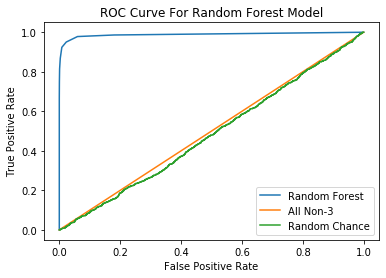

In [22]:
#The classifier I will be using is the random forest classifier with default parameters. 
final_forest = RandomForestClassifier()
final_forest.fit(train_dataset, binary_train)
random_forest_predict = final_forest.predict_proba(test_dataset)[:,1]

#Fitting Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(binary_test,  random_forest_predict)
Rfpr, Rtpr, Rthresholds = metrics.roc_curve(binary_test,randomprobs(binary_test))
plt.plot(fpr,tpr, label= 'Random Forest')
Thrfpr, Thrtrp, thresholds = metrics.roc_curve(binary_test, allones(binary_test))
plt.plot(Thrfpr, Thrtrp, label = 'All Non-3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Random Forest Model')
boundary = [0.0, 1.0]
plt.plot(Rfpr, Rtpr, label='Random Chance')
plt.legend(loc=4)
plt.show()





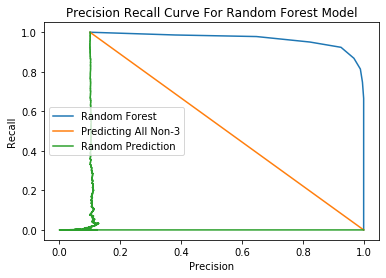

In [23]:
from sklearn.metrics import precision_recall_curve
#Fitting Precision Recall Curve

precision, recall,thresholds = precision_recall_curve(binary_test,  random_forest_predict)
Rprecision, RRecall, Rthresholds = precision_recall_curve(binary_test,randomprobs(binary_test))
ThrPrecision, ThRecall, thresholds = precision_recall_curve(binary_test, allones(binary_test))
plt.plot(precision,recall, label= 'Random Forest')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve For Random Forest Model')
plt.plot(ThrPrecision, ThRecall, label='Predicting All Non-3')
plt.plot(Rprecision,RRecall, label='Random Prediction' )
plt.legend(loc = 'center left')
plt.show()

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**Increasing regularization decreased the number of non-zero parameters and the AUC values while increasing the cost associated with the model. The effect of increasing regularization on F1 score varied across the range of regularization values. One implication of this graph is that high amounts of regularization with lasso regression will push more and more coefficients to zero. This made the model slightly worse (in terms of AUC/cost) but the change was very small. Additionally, the F1 score actually improved once the regularization was strong enough. Another takeaway is that may not need to use all of the predictors you have in your model. You should do some form of feature selection especially if you have high-dimensional data.**

In [24]:
from sklearn.linear_model import LogisticRegression

#Building multiple linear regression models with lasso regularization Each one has a different regularization strength.
num_params =[]
model_costs = []
f1_scores = []
AUCs = []
C_values = []


In [25]:
for i in range(20):
    print(i)
    LogModel = LogisticRegression(penalty='l1', C = 1/(i+1))

    LogModel.fit(train_dataset, binary_train)
    
    #Generating probabilities to calculate cost
    pred_logmodel = LogModel.predict_proba(train_dataset)[:,1]
    
    #Generating predicted classes to calculate F1 score
    predicted_log_classes = LogModel.predict(train_dataset)
    
    f1_scores.append(metrics.f1_score(binary_train, predicted_log_classes))

    num_params.append(np.count_nonzero(LogModel.coef_)) #Add number of non-zero parameters.

    model_costs.append(CostFunction(binary_train, pred_logmodel)) #Add cost to array

    AUCs.append(metrics.roc_auc_score(binary_train, pred_logmodel))
    C_values.append(1/(i+1))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


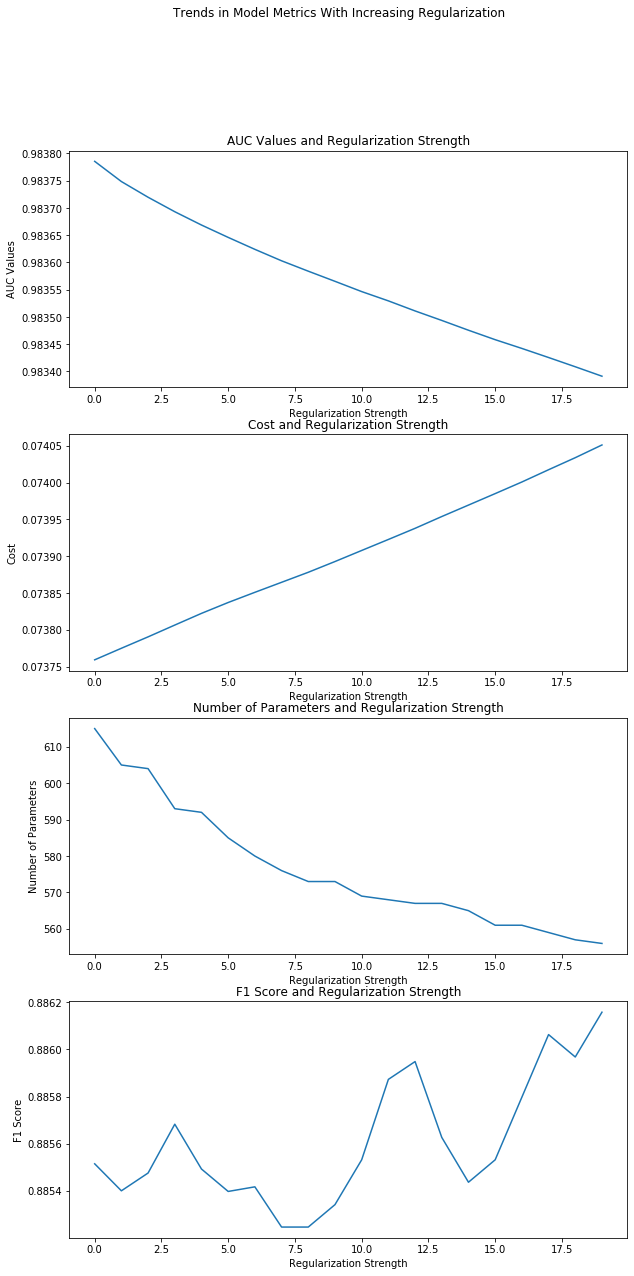

In [26]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4,1, figsize=(10,20))
#plotting auc
ax1.plot(AUCs, label= 'AUC')
ax1.set_title('AUC Values and Regularization Strength')
ax1.set_ylabel('AUC Values')
ax1.set_xlabel('Regularization Strength')

#Plotting costs
ax2.plot(model_costs)
ax2.set_title('Cost and Regularization Strength')
ax2.set_ylabel('Cost')
ax2.set_xlabel('Regularization Strength')

#Plotting parameter number
ax3.plot(num_params)
ax3.set_title('Number of Parameters and Regularization Strength')
ax3.set_ylabel('Number of Parameters')
ax3.set_xlabel('Regularization Strength')
#plotting f1 scores
ax4.plot(f1_scores)
ax4.set_ylabel('F1 Score')
ax4.set_xlabel('Regularization Strength')
ax4.set_title('F1 Score and Regularization Strength')
plt.suptitle('Trends in Model Metrics With Increasing Regularization')
plt.show()

## 3

**ANSWER**

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

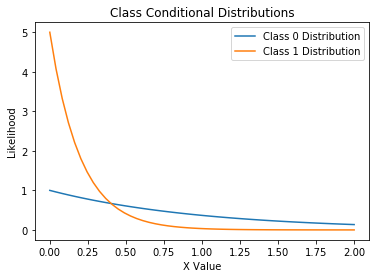

In [27]:
from scipy.stats import expon 

#Plotting distribution of x for class 0
zero= expon(scale=1)
one = expon(scale=.2)


#Up to 2 in range for values
dist_0 = np.linspace(0, np.minimum(zero.dist.b, 2)) 
dist_1 = np.linspace(0, np.minimum(one.dist.b, 2)) 
plt.plot(dist_0, zero.pdf(dist_0), label='Class 0 Distribution')
plt.plot(dist_1, one.pdf(dist_1), label= 'Class 1 Distribution') 
plt.xlabel('X Value')
plt.ylabel('Likelihood')
plt.title('Class Conditional Distributions')
plt.legend()

**(b)**

We are given that the distribution of x in each class is the following:
$$p(x|c_0) = e^{-x}$$
$$p(x|c_1) = 5e^{-5x}$$

The conditional probability of x class 0 can be written as:
$$p(c_0|x) = \frac{p(x|c_0) \cdot p(c_0)}{\sum_{i=0}^{1} p(x|c_i) \cdot p(c_i)}$$

We want to find a value of x such that:
$$p(c_0|x) >.50$$
Thus:
$$\frac{p(x|c_0) \cdot p(c_0)}{\sum_{i=0}^{1} p(x|c_i) \cdot p(c_i)} >.50$$

Substituting our values we know into the equation gives:

$$\frac{{e^{-x}}}{(e^{-x} + 5e^{-5x})} >.50 $$

Solving for x gives:
$$ x > .402359$$


In [28]:
#Creating bayes decision rule classifier.

def bayesclass(scale_0, scale_1, prob_class_0 ,x, cutoff):
    zero_dist = expon(scale = scale_0) #Create first dist
    one_dist = expon(scale = scale_1) #Create second dist
    evidence = (zero_dist.pdf(x)*prob_class_0) + (one_dist.pdf(x)*(1-prob_class_0)) #Calc evidence
    prob_0 = (zero_dist.pdf(x)*prob_class_0)/evidence
    preds = prob_0>cutoff #Check if probability is greater than the cutoff
    preds = ~preds
    return (preds.astype(int))

**(c)** 
**The value of x we solved for appears to correspond to the place on the graph where the two lines intersect. This makes sense, as the line for the class 0 likelihood is above the class 1 line for values greater than .402359. This means that it is more likely for the class to be of class 0 once you exceed that value.**

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

In [29]:
#Reading in data
bayes_test_data = pd.read_csv('A3_Q3_test.txt')
x_bayes_test = bayes_test_data.to_numpy()[:,1]

#Making predictions with bayes classifer. 
bayes_labels = bayes_test_data.to_numpy()[:,-1]
bayes_predictions =bayesclass(1,.2,.5,x_bayes_test,.402359)
#Calculating overall accuracy. 
error_rate_bayes = 1 - np.mean(bayes_predictions==bayes_labels)

print('The misclassification error of the Bayes Classifier on test data is {}.'.format(error_rate_bayes))

The misclassification error of the Bayes Classifier on test data is 0.24409999999999998.


**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?


**The misclassification error for the logistic regression model on the test dataset is nearly identical to the bayes classifier [.244 vs .233].**

In [30]:
#Loading in training data
train_bayes_data = pd.read_csv('A3_Q3_train.csv')
train_x_bayes = train_bayes_data.to_numpy()[:,1]
train_x_bayes = np.reshape(train_x_bayes,(-1,1))

#Making predictions with bayes classifer. 
train_bayes_labels = train_bayes_data.to_numpy()[:,-1]

#Fitting Logistic model

logit_mod = LogisticRegression()
logit_mod.fit(train_x_bayes, train_bayes_labels)

#Checking accuracy on test data
log_class_pred = logit_mod.predict(x_bayes_test.reshape(-1,1))
error_rate_logistic = 1 - np.mean(log_class_pred==bayes_labels)

print('The misclassification error of the Logistic Classifier on test data is {}.'.format(error_rate_logistic))

The misclassification error of the Logistic Classifier on test data is 0.23399999999999999.


**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**In order to get a value of the logistic regression sigmoid > .5 we need a certain x value. The intercept is -3.97529426 and the coefficient on x is 1.60336319. We can use these values to solve for the x that produces a probability of class 0 greater than .5. The process of solving this equation is detailed below.**

$$ P(Class_0) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-(-3.97529426x+1.60336319)}}  $$ 

$$\frac{\mathrm{1} }{\mathrm{1} + e^{-(-3.97529426x+1.60336319)}}  >.50$$ 

$$ x >.403072$$

**It turns out that the logistic regression model produces a nearly identical decision rule to the Bayes classifier.**

In [31]:
#Printing coefficients and intercepts.
print(logit_mod.coef_)
print(logit_mod.intercept_)


[[-3.97529426]]
[1.60336319]


**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**Changing the prior probabilites would impact the optimal decision rule. If you had less of a certain class it would make it more unlikely that you would predict that class. If you increased the amount of instances of class 1 the boundary that x would have to exceed to yield class 0 would also increase. $x^*$ would become larger.**

## 4

**ANSWER**

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**I plan to use lung image data to build a model that determines whether or not you have tuberculosis based on an x-ray of your lung. The goal would be to flag images as high or low priority to be reviewed by a physician. An algorithm of this type could lead to many benefits for those recieving healthcare and to the healthcare system as a whole. X-ray images are generally evaluated by a radiologist who, as a physician, has very valuable time. Reducing the amount of images a radiologist has to examine could lead to a cost reduction for patients and hospitals. Additionally, given how contagious and dangerous tuberculosis can be, being able to identify the presence of disease quickly may help prevent further infection or death. The dataset I used was obtained from the National Library of Medicine in collaboration with Shenzhen No.3 People's Hosptal and contains 632 lung images. Half of the images display tuberculosis infections and and half do not.**

Citations:

1)	Jaeger S, Karargyris A, Candemir S, Folio L, Siegelman J, Callaghan F, Xue Z, Palaniappan K, Singh RK, Antani S, Thoma G, Wang YX, Lu PX, McDonald CJ.  Automatic tuberculosis screening using chest radiographs. IEEE Trans Med Imaging. 2014 Feb;33(2):233-45. doi: 10.1109/TMI.2013.2284099. PMID: 24108713

2)	Candemir S, Jaeger S, Palaniappan K, Musco JP, Singh RK, Xue Z, Karargyris A, Antani S, Thoma G, McDonald CJ. Lung segmentation in chest radiographs using anatomical atlases with nonrigid registration. IEEE Trans Med Imaging. 2014 Feb;33(2):577-90. doi: 10.1109/TMI.2013.2290491. PMID: 24239990

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

In [32]:
#Reading in data
from skimage.transform import resize
from skimage import io
import os 
#Specifying path to get data from 

path = r'C:/Users/Joe Krinke/Desktop/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/'
os.chdir(path)
#Create array to hold data
lung_images = []
labels = []

#Read in Images and resize them
for i in range(326):
    number = str(i+1)
    number = number.rjust(4, '0')
    name = str(r'CHNCXR_') + number + r'_0.png'  #Create filename, padding the number in the center to match the format.[CHNCXR_0001_0] Last 0 indicates no disease.  
    unprocessed = io.imread(name,as_gray = True)
    resized = resize(unprocessed, (1000,1000)) #Resize images to standard size
    lung_images.append(resized)
    labels.append(0) #Add label indicating they are negative for disease. 
#Positive images go from 327 - 662 inclusive
for i in range(327,662):
    number = str(i+1)
    number = number.rjust(4, '0')
    name = str(r'CHNCXR_') + number + r'_1.png'  #Create filename, padding the number in the center to match the format.[CHNCXR_0001_1] Last 1 indicates disease.  
    unprocessed = io.imread(name, as_gray = True)
    resized = resize(unprocessed, (1000,1000))
    lung_images.append(resized)
    labels.append(1) 

#Convert data
lung_images = np.stack(lung_images)

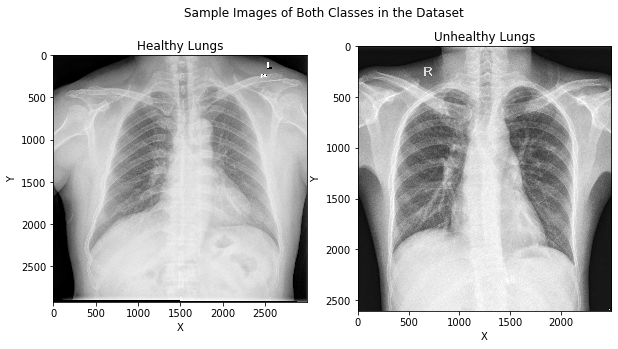

In [33]:
#Printing two sample classes to show the data. 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5)) 
healthy = io.imread('CHNCXR_0001_0.png', as_gray=True) #Read in grayscale images
ax1.imshow(healthy, cmap ='gray',vmin=0, vmax=255) #Printing healthy image
ax1.set_title('Healthy Lungs')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
unhealthy = io.imread('CHNCXR_0555_1.png', as_gray = True)
ax2.imshow(unhealthy,cmap ='gray', vmin=0, vmax=255) #Printing unhealthy image
ax2.set_title('Unhealthy Lungs')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.suptitle('Sample Images of Both Classes in the Dataset')
plt.show()

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**My target variable is a binary class. 1 indicates the presence of pneumonia and 0 indicates healthy lungs. I have a set of 662 images of lungs (half healthy and half unhealthy) along with their corresponding labels. Each image is approximately 2900x2900, but the sizes can vary so I need to resize them to a standard size. Additionally, I need to convert the images from RGB to grayscale in order to reduce the dimensionality of the data. This transformation is especially appropriate since x-rays are black-and-white images to begin with. The data is clean and has been labeled by physicians. No normalization is necessary as the values of that pixel can take have the exact same range.**


**(d)** What supervised learning technique will you use and why? 

**I plan to use logistic regression as my baseline model of performance. Logistic regression is simple and could work well if the data is linearly separable. The other model I plant to use is a random forest model. The random forest will be a better predictor if the classification boundary is more complex and non-linear.**

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**I chose to use a training and test dataset due to the large size of the image data. Each image, even after size reduction, is very complex. Fitting random forest models for each fold could quickly become time-consuming and computationally intensive. Consequently, I felt it was appropriate to evaluate whether my model overfit using the training and test data alone.**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
#Divide data into training and test sets. 
xray_train, xray_test, xray_labels_train, xray_labels_test = train_test_split(lung_images, labels, test_size=0.20, random_state=42)

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

In [35]:

#Preprocessing images to be used by the classifier
train_rows, train_numx, train_numy = xray_train.shape
xray_train_fix = xray_train.reshape((train_rows,train_numx*train_numy))
test_rows, test_numx, test_numy = xray_test.shape
xray_test_fix = xray_test.reshape((test_rows, test_numx*test_numy))
#Create logistic regression model as baseline. 

baseline = LogisticRegression()
baseline.fit(xray_train_fix, xray_labels_train)
xray_baseline_predict = baseline.predict_proba(xray_test_fix)[:,1]

#Create random forest model. 
lung_forest = RandomForestClassifier()
lung_forest.fit(xray_train_fix, xray_labels_train)
xray_forest_predict = lung_forest.predict_proba(xray_test_fix)[:,1]


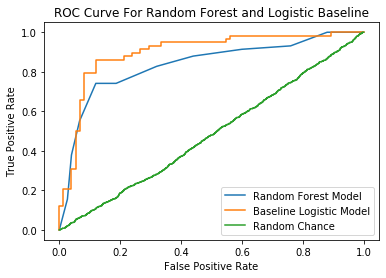

0.8972413793103449 0.8358620689655172


In [36]:
#Plot ROC curves for both models.
BLfpr, BLtpr, BLthresholds = metrics.roc_curve(xray_labels_test,  xray_baseline_predict)
RFfpr, RFtpr, RFthresholds = metrics.roc_curve(xray_labels_test,xray_forest_predict)
plt.plot(RFfpr,RFtpr, label= 'Random Forest Model')
plt.plot(BLfpr, BLtpr, label = 'Baseline Logistic Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Random Forest and Logistic Baseline')
plt.plot(Rfpr, Rtpr, label='Random Chance')
plt.legend(loc=4)
plt.show()

print(metrics.roc_auc_score(xray_labels_test,  xray_baseline_predict),metrics.roc_auc_score(xray_labels_test,  xray_forest_predict ))

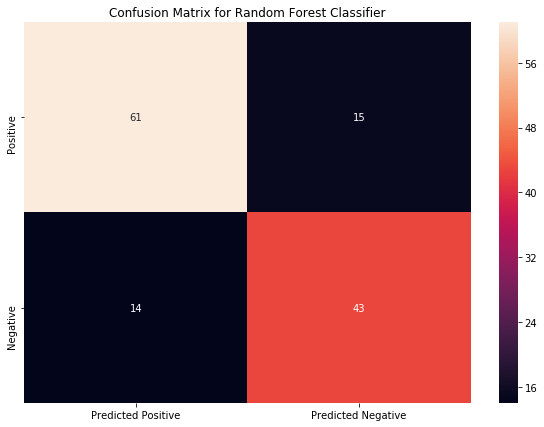

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#Evaluate confusion matrix on the test data
confusion_matrix_forest = confusion_matrix(lung_forest.predict(xray_test_fix), xray_labels_test)
confusion_matrix_df = pd.DataFrame(confusion_matrix_forest, index = [i for i in ('Positive', 'Negative')],
                  columns = [i for i in ('Predicted Positive', 'Predicted Negative') ])
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
sn.heatmap(confusion_matrix_df, annot=True)


**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

**The random forest model performed fairly well overall, with a test set accuracy of 78 % and AUC of .827. This performance isn't terrible given the classes were equally balanced. However, the baseline logistic regression model was able to achieve a higher AUC of .897. This is likely due to the fact that there is a lot of noise in the image data. Some noise factors were that images were resized from different original sizes, images were taken on patients who filled up the x-ray machine differently, and images were taken on people of different genders. Potential improvements to the modeling could include more complex image pre-processing. Images could be cropped to eliminate blank space, features could be generated from 'influential' areas (in the center of the lungs). or some kind of information about the gender of the patient could also be incorporated. Different models may have also been able to fit the data better. It is possible that the flexibility of the random forest ended up being its downfall- it may have overfit to the data. We could try techniques like PCA or logistic regression with regularization to reduce the amount of features.**